### Bharat Intern Internship

### <b><u><center>Task 3-Number Recognition</b></u></center>

In this machine learning project, we will recognize handwritten characters, i.e, alphabets or digits. This we are going to achieve by modeling a neural network that will have to be trained over a dataset containing images of alphabets or digits.

In [1]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()

# reshaping the training and testing data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [3]:
# normalizing the values of pixels of images
x_train = x_train.astype('float32') / 255.0
x_test= x_test.astype('float32') / 255.0

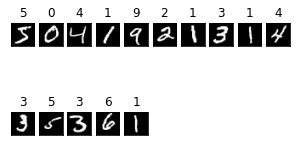

In [4]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
  ax = fig.add_subplot (2,10, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze (x_train[i]), cmap='gray')
  ax.set_title(y_train[i])

In [5]:
# determine the shape of input images
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [6]:
# defining the model
model = Sequential()
model.add(Conv2D (32, (3,3), activation='relu', input_shape=img_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D (48, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout (0.5))
model.add(Flatten())
model.add(Dense (500, activation= 'relu'))
model.add(Dense (10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [8]:
plot_model(model, 'model.jpg', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
epochs = range(10)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x=model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 38s - loss: 0.2355 - accuracy: 0.9292 - val_loss: 0.0704 - val_accuracy: 0.9808 - 38s/epoch - 91ms/step
Epoch 2/10
422/422 - 35s - loss: 0.0839 - accuracy: 0.9738 - val_loss: 0.0385 - val_accuracy: 0.9900 - 35s/epoch - 83ms/step
Epoch 3/10
422/422 - 35s - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.0348 - val_accuracy: 0.9897 - 35s/epoch - 84ms/step
Epoch 4/10
422/422 - 35s - loss: 0.0486 - accuracy: 0.9844 - val_loss: 0.0276 - val_accuracy: 0.9920 - 35s/epoch - 84ms/step
Epoch 5/10
422/422 - 35s - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0303 - val_accuracy: 0.9917 - 35s/epoch - 83ms/step
Epoch 6/10
422/422 - 35s - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0293 - val_accuracy: 0.9920 - 35s/epoch - 83ms/step
Epoch 7/10
422/422 - 36s - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0267 - val_accuracy: 0.9933 - 36s/epoch - 85ms/step
Epoch 8/10
422/422 - 37s - loss: 0.0285 - accuracy: 0.9901 - val_loss: 0.0272 - val_accuracy: 0.9932 - 37s/epoch - 87ms/step


In [11]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print (f'Accuracy: {accuracy*100}')

Accuracy: 99.37000274658203


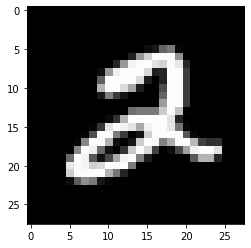

In [12]:
image = x_train[5]

# lets display the image which we want to predict
plt.imshow(np.squeeze (image), cmap='gray')
plt.show()

In [13]:
image = image.reshape(1,image.shape[0], image.shape[1], image.shape[2])
p = model.predict([image])
print('Predicted: {}'.format(argmax(p)))

1/1 [==============================] - 0s 333ms/step
Predicted: 2
